In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
path = "CrossValidationResults/"

In [9]:
df = pd.DataFrame(columns=['name', 'precision', 'recall', "f1"])

In [10]:
i = 0
for exp_name in os.listdir(path):
    if "ipynb" not in exp_name:
        precision = []
        recall = []
        f1 = []
        for split in os.listdir(path+exp_name):
            if "ipynb" not in split:
                f = open(path + exp_name + "/" + split + "/Metrics.txt", 'r')
                text = f.read()
                #print(exp_name)
                #print(text.split("\n"))
                if "Full" not in text:
                    text = text.replace("precision", "Full precision")
                    text = text.replace("recall", "Full recall")
                #print(text.split("\n"))

                precision.append(float(text.split("\n")[-4].split(" ")[2]))
                recall.append(float(text.split("\n")[-3].split(" ")[2]))            
                f1.append(float(text.split("\n")[-2].split(" ")[2])) 
                f.close()
        df.loc[i] = [exp_name] + [np.mean(precision), np.mean(recall), np.mean(f1)]
        i += 1
        

In [11]:
df.sort_values("f1", ascending=False)

,name,precision,recall,f1
21,NewSWI,0.876762,0.776043,0.819672
25,FirstExperement,0.876762,0.776043,0.819672
7,Freq500,0.854180,0.686722,0.752122
4,32MultyLeadsRecordsOptuna,0.805944,0.629936,0.701721
2,28MultyLeadsRecords,0.840354,0.610971,0.699826
1,28RecordsMultiElectrodelabels,0.860228,0.586107,0.685486
18,28RecordsMultiElectrodelabelsOnlyConfident,0.820694,0.593146,0.679134
0,32MultyLeadsRecords,0.778158,0.609525,0.672151
16,24RecordsNormalizedRightFreq,0.792597,0.598805,0.659248
17,18RecordsNormalized,0.773036,0.588744,0.659240


In [19]:
pd.concat((df[df["name"] == "32MultyLeadsRecords"], df[df["name"] == "32MultyLeadsRecordsOptuna"])).to_csv("Summary.csv", sep="\t")

# Some results visualisation

In [20]:
exp_names = ["32MultyLeadsRecords", "32MultyLeadsRecordsOptuna", "28RecordsNormalizedRightFreq", "28RecordsMultiElectrodelabels",
            "20RecordsNormalizedRightFreqSNEO&MC", "28MultyLeadsRecords", "MoscowRecordsNormalizedRightFreqSNEO&MC", "24RecordsNormalizedRightFreq"]

In [21]:
df = pd.DataFrame(columns=['record name', 'exp name', 'precision', 'recall', "f1", "best epoch", "swi", "swi_pred"])

In [22]:
def GetAllTableValues(rows, exp_name):
    name = rows[0].split("/")[1].split("=")[0]
    precision = float(rows[1].split(" ")[1])
    recall = float(rows[2].split(" ")[1])  
    f1 = float(rows[3].split(" ")[2])
    return name, exp_name, precision, recall, f1

In [23]:
for exp_name in exp_names:
    
    precision = []
    recall = []
    f1 = []
    for split in os.listdir(path+exp_name):
        if "ipynb" not in split:
            f = open(path + exp_name + "/" + split + "/Metrics.txt", 'r')
            text = f.read()
            be_f = open(path + exp_name + "/" + split + "/BestEpoch.txt", 'r')
            be = int(be_f.read())
            swi_f = open(path + exp_name + "/" + split + "/SWITrue", 'r')
            swi_p = open(path + exp_name + "/" + split + "/SWIPred", 'r')

            swi_text = swi_f.read()
            swi = float(swi_text.split("\n")[0])

            swi_text_pred = swi_p.read()
            swi_pred = float(swi_text_pred.split("\n")[0])
            df.loc[len(df)] = list(GetAllTableValues(text.split("\n")[:4], exp_name)) + [be, swi, swi_pred]
            if len(text.split("\n")) > 9:
                swi = float(swi_text.split("\n")[1])
                swi_pred = float(swi_text_pred.split("\n")[1])
                df.loc[len(df)] = list(GetAllTableValues(text.split("\n")[4:8], exp_name)) + [be, swi, swi_pred]
            
            
#             precision.append(float(text.split("\n")[-4].split(" ")[2]))
#             recall.append(float(text.split("\n")[-3].split(" ")[2]))            
#             f1.append(float(text.split("\n")[-2].split(" ")[2])) 
            f.close()
            be_f.close()
            swi_f.close()
        
            
#     df.loc[i] = [exp_name] + [np.mean(precision), np.mean(recall), np.mean(f1)]


In [7]:
df["swi"].unique()

array([0.16442876, 0.07251546, 0.02996443, 0.07925333, 0.05414977,
       0.19426641, 0.31072828, 0.07107016, 0.26867342, 0.16837651,
       0.09956834, 0.11453972, 0.03257082, 0.15311918, 0.05942882,
       0.07368591, 0.08924472, 0.07695533, 0.41475442, 0.15750989,
       0.08123238, 0.07049548, 0.08512289, 0.14723931, 0.16230486,
       0.26844049, 0.22903261, 0.243058  , 0.2228819 , 0.19004545,
       0.09119358, 0.1236964 , 0.03215968, 0.06244146, 0.05632171,
       0.10270645, 0.2706472 ])

In [8]:
(df[df["exp name"] == "28RecordsNormalizedRightFreq"]["swi"] >= 0.2).sum()

7

In [24]:
df = df.sort_values("record name")

In [25]:
df['record name'] = df['record name'].replace({'P1.edf': 'P1_3.edf', "P1_2.edf": "P1_4.edf"})

In [30]:
df1 = df[df['exp name'] == '32MultyLeadsRecords']
df2 = df[df['exp name'] == '32MultyLeadsRecordsOptuna']

# Объединение данных
result = pd.merge(df1[['record name', 'f1']], 
                 df2[['record name', 'f1']], 
                 on='record name', 
                 how='outer', 
                 suffixes=(' Old Params', ' Optimized Params'))
result.to_csv("RecordsComparison.csv", sep="\t")

<Axes: xlabel='record name', ylabel='f1'>

<Figure size 1600x900 with 0 Axes>

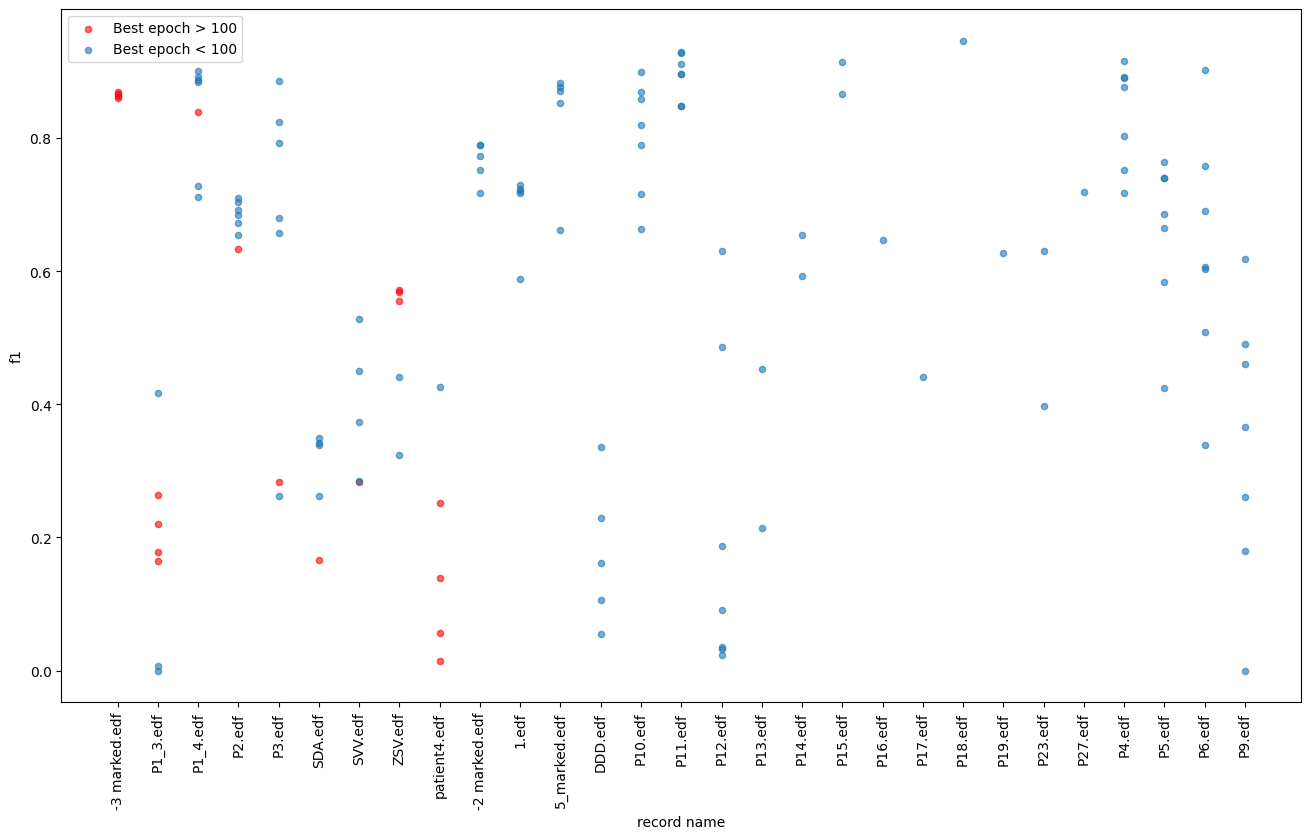

In [14]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["best epoch"] >= 100].plot(x="record name", y = "f1", kind="scatter", rot=90, color="red", label="Best epoch > 100", alpha=0.6)
df[df["best epoch"] < 100].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label="Best epoch < 100", alpha=0.6)

<Axes: xlabel='record name', ylabel='f1'>

<Figure size 1600x900 with 0 Axes>

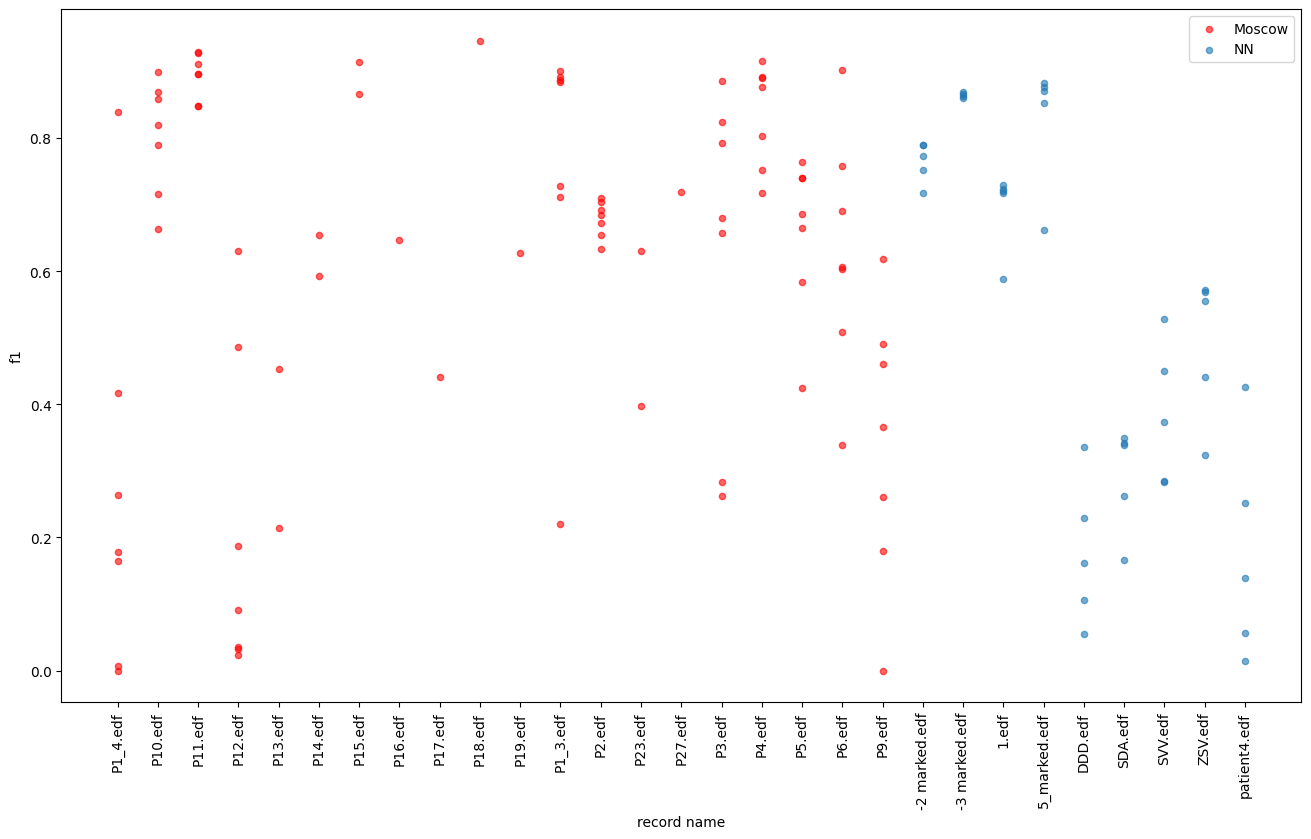

In [17]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["record name"].str.match('P')].plot(x="record name", y = "f1", kind="scatter", rot=90, color="red", label="Moscow", alpha=0.6)
df[(1- df["record name"].str.match('P')).astype("bool")].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label="NN", alpha=0.6)

<Axes: xlabel='record name', ylabel='f1'>

<Figure size 1600x900 with 0 Axes>

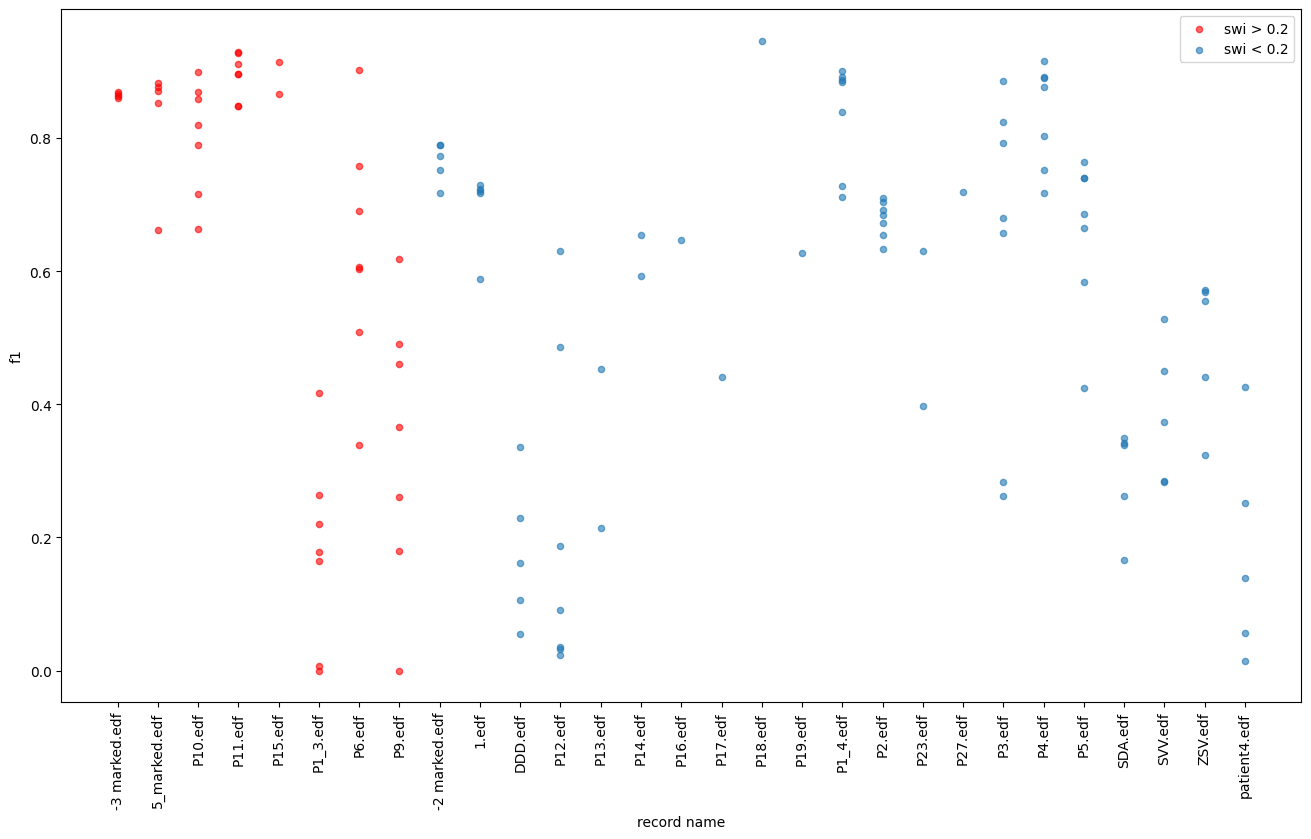

In [ ]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["swi"] >= 0.2].plot(x="record name", y = "f1", kind="scatter", rot=90, color="red", label="swi > 0.2", alpha=0.6)
df[df["swi"] < 0.2].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label="swi < 0.2", alpha=0.6)

In [11]:
colors = ["red", "blue", "yellow", "green", "orange", "pink", "purple", "black"]

<Figure size 1600x900 with 0 Axes>

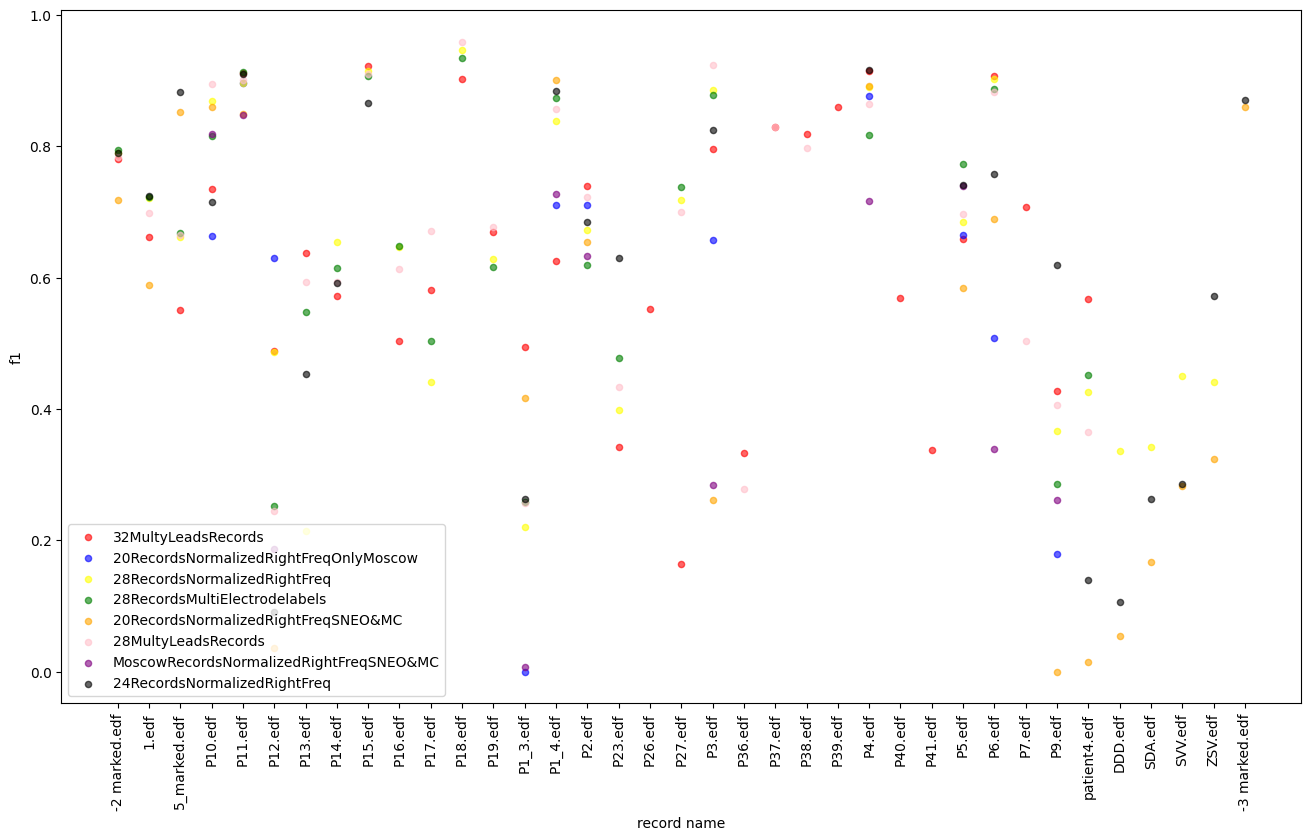

In [12]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["exp name"] == exp_names[0]].plot(x="record name", y = "f1", kind="scatter", rot=90, color=colors[0], label=exp_names[0], alpha=0.6)
for i, exp_name in enumerate(exp_names[1:]):
    df[df["exp name"] == exp_name].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label=exp_name, color = colors[i+1], alpha=0.6)

<Figure size 1600x900 with 0 Axes>

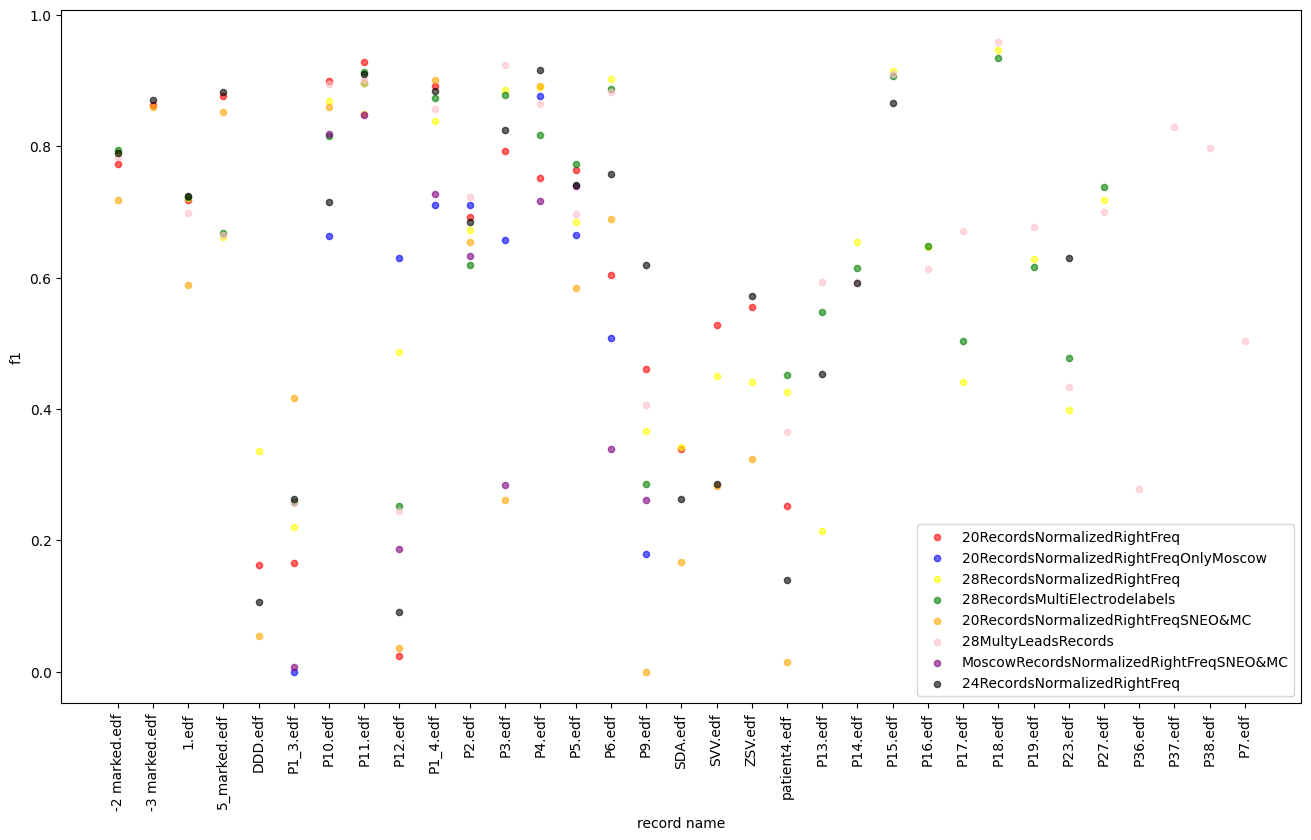

In [14]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["exp name"] == exp_names[0]].plot(x="record name", y = "f1", kind="scatter", rot=90, color=colors[0], label=exp_names[0], alpha=0.6)
for i, exp_name in enumerate(exp_names[1:]):
    df[df["exp name"] == exp_name].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label=exp_name, color = colors[i+1], alpha=0.6)

<Figure size 1600x900 with 0 Axes>

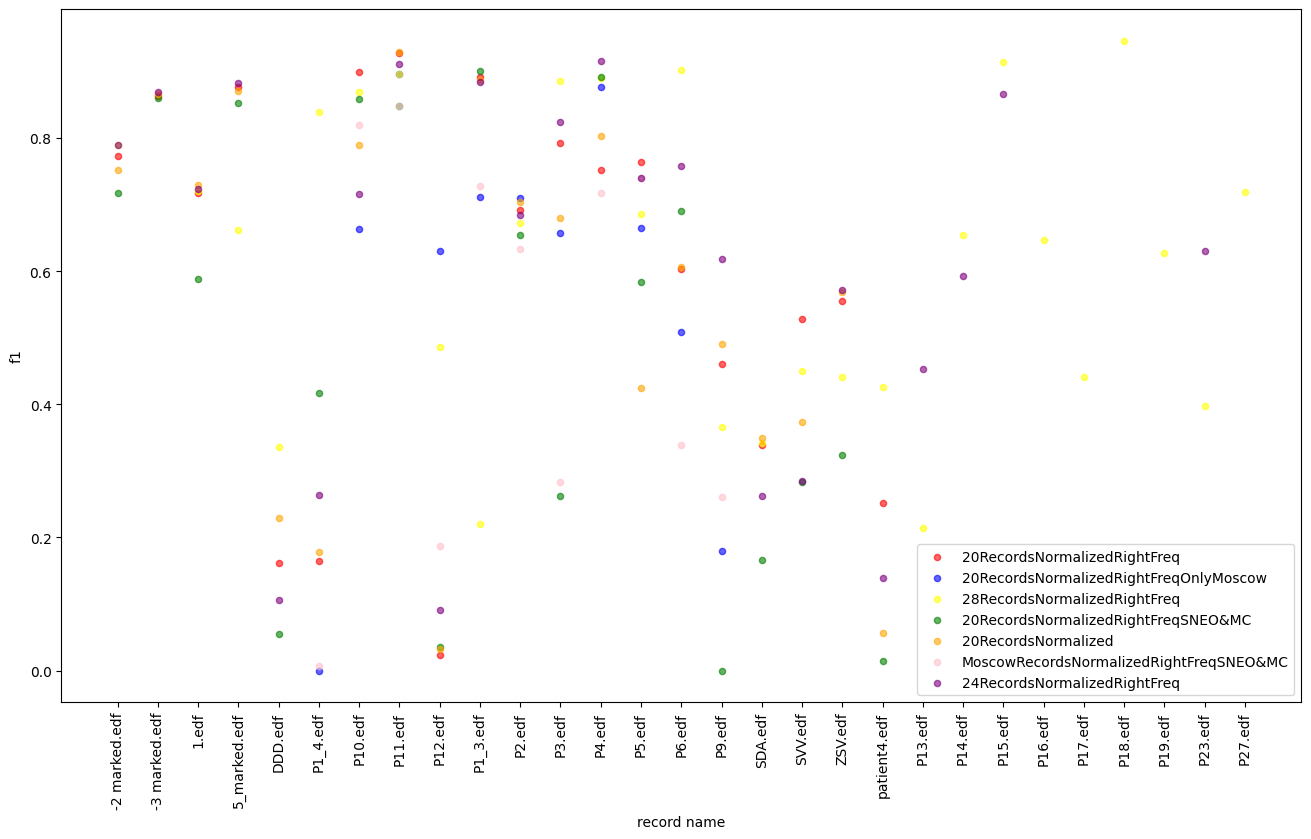

In [24]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["exp name"] == exp_names[0]].plot(x="record name", y = "f1", kind="scatter", rot=90, color=colors[0], label=exp_names[0], alpha=0.6)
for i, exp_name in enumerate(exp_names[1:]):
    df[df["exp name"] == exp_name].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label=exp_name, color = colors[i+1], alpha=0.6)

<Figure size 1600x900 with 0 Axes>

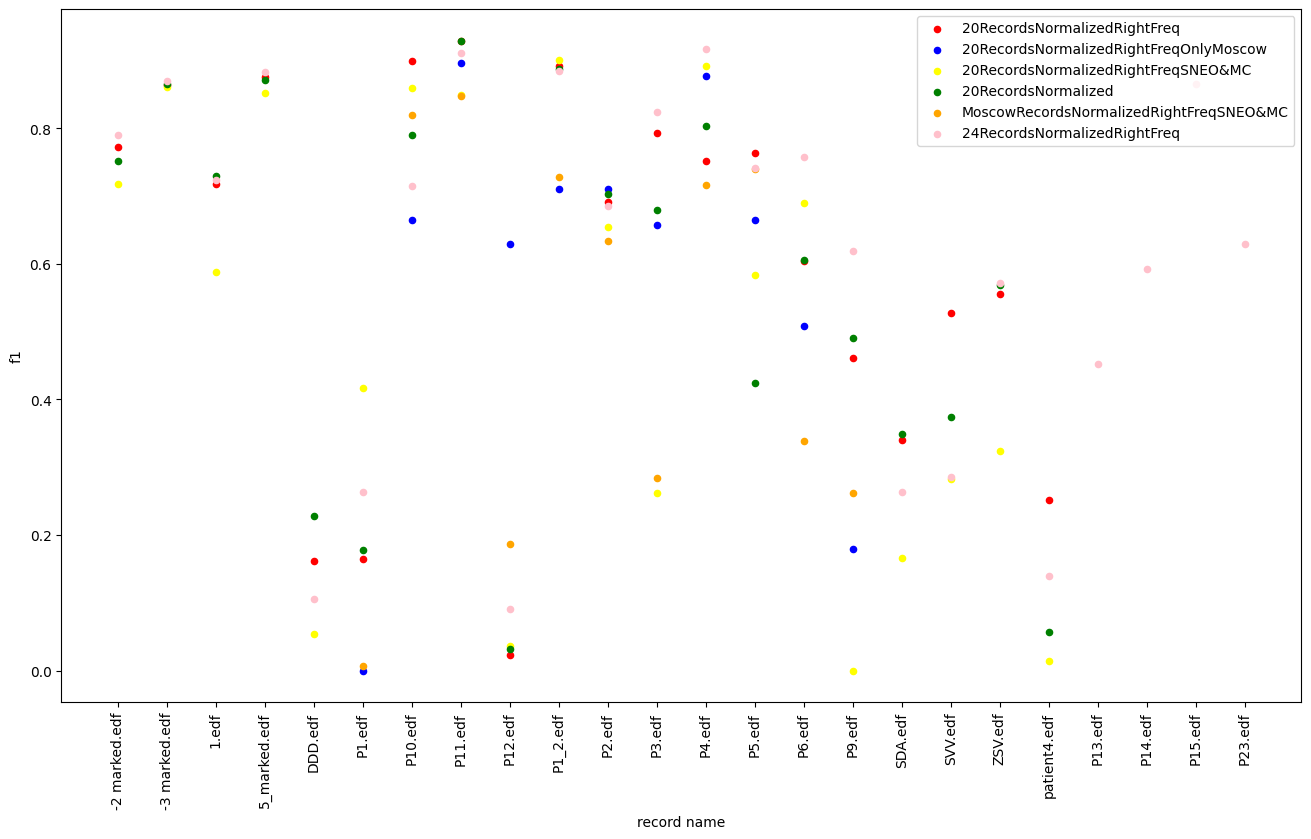

In [13]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["exp name"] == exp_names[0]].plot(x="record name", y = "f1", kind="scatter", rot=90, color=colors[0], label=exp_names[0])
for i, exp_name in enumerate(exp_names[1:]):
    df[df["exp name"] == exp_name].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label=exp_name, color = colors[i+1])

<Figure size 1600x900 with 0 Axes>

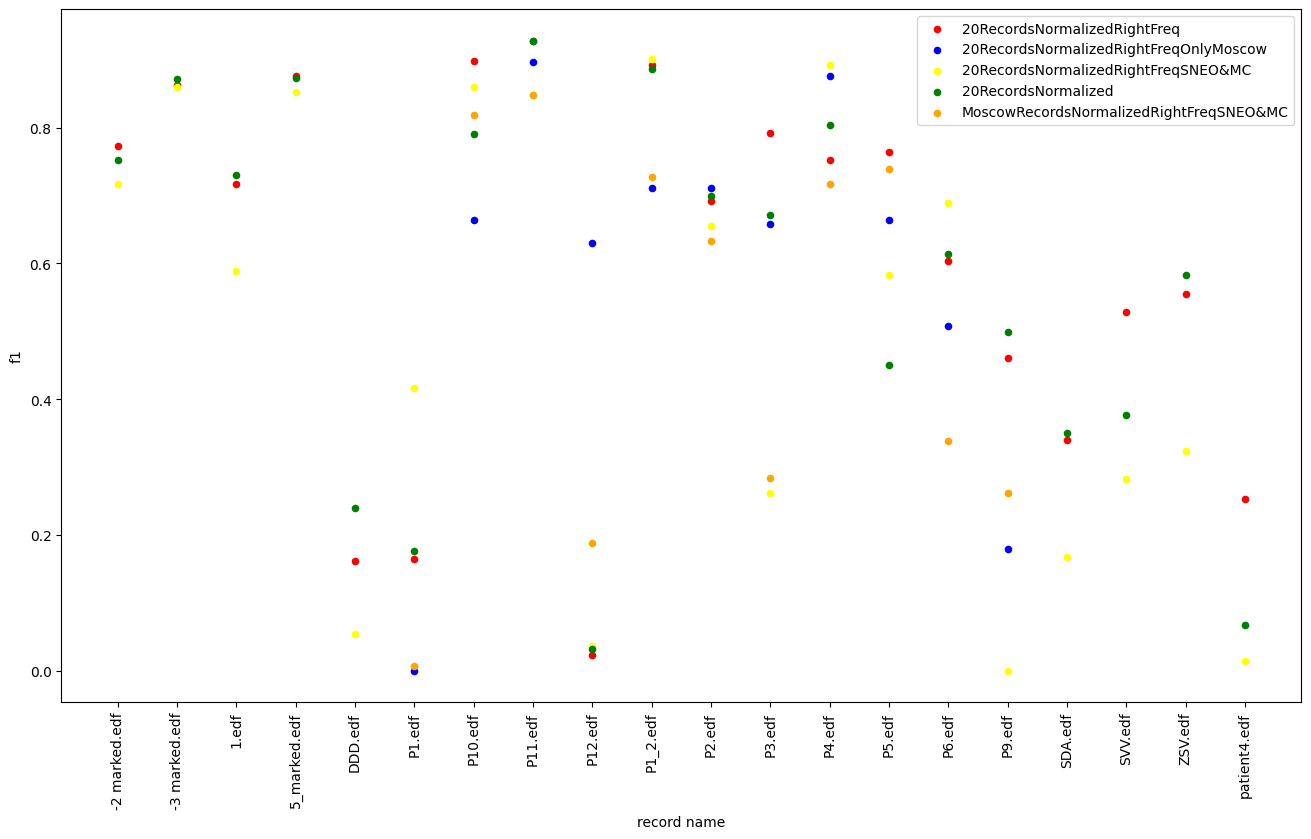

In [17]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
ax = df[df["exp name"] == exp_names[0]].plot(x="record name", y = "f1", kind="scatter", rot=90, color=colors[0], label=exp_names[0])
for i, exp_name in enumerate(exp_names[1:]):
    df[df["exp name"] == exp_name].plot(x="record name", y = "f1", kind="scatter", rot=90, ax=ax, label=exp_name, color = colors[i+1])

<Axes: xlabel='record name', ylabel='swi'>

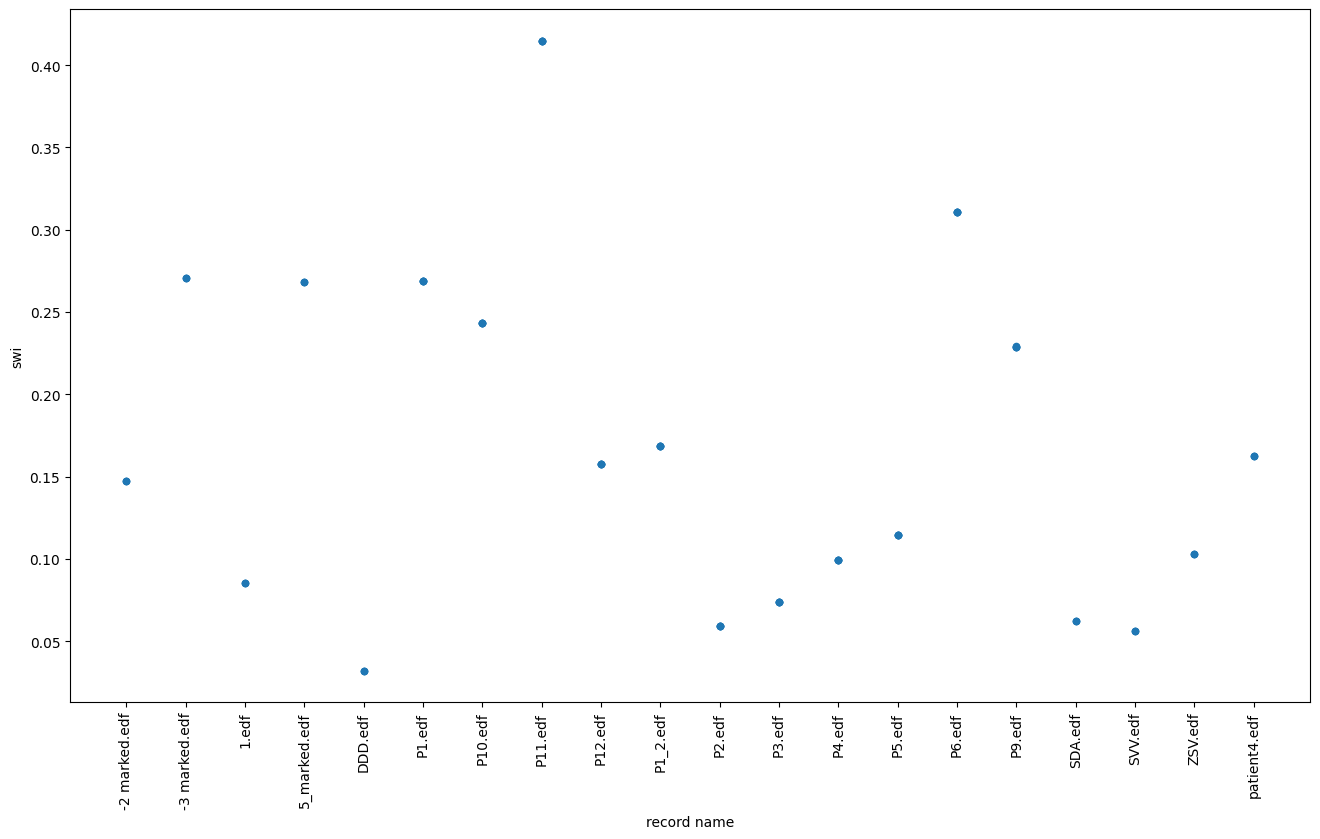

In [21]:
df.plot(x="record name", y = "swi", kind="scatter", rot=90)

<Axes: xlabel='record name', ylabel='recall'>

<Figure size 1600x900 with 0 Axes>

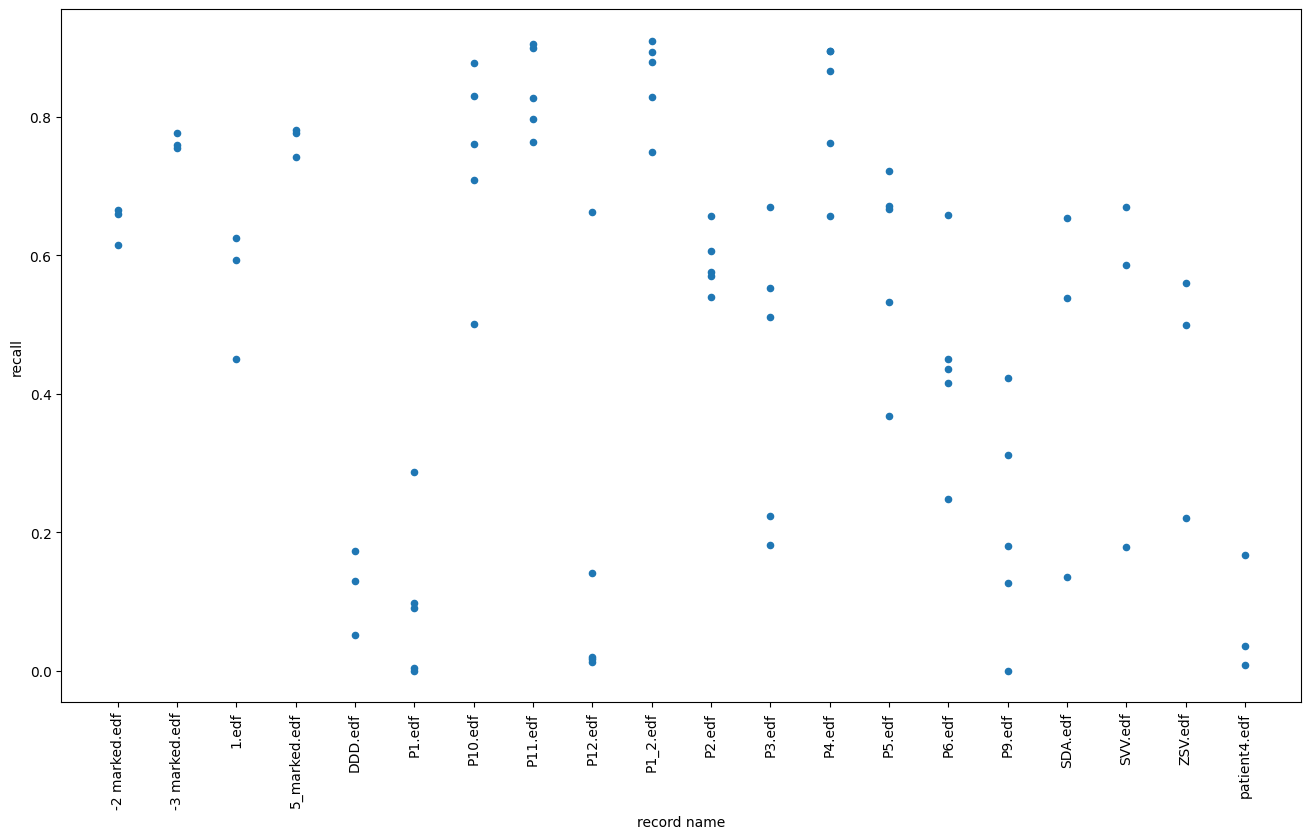

In [17]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
df.plot(x="record name", y = "recall", kind="scatter", rot=90)

<Axes: xlabel='record name', ylabel='precision'>

<Figure size 1600x900 with 0 Axes>

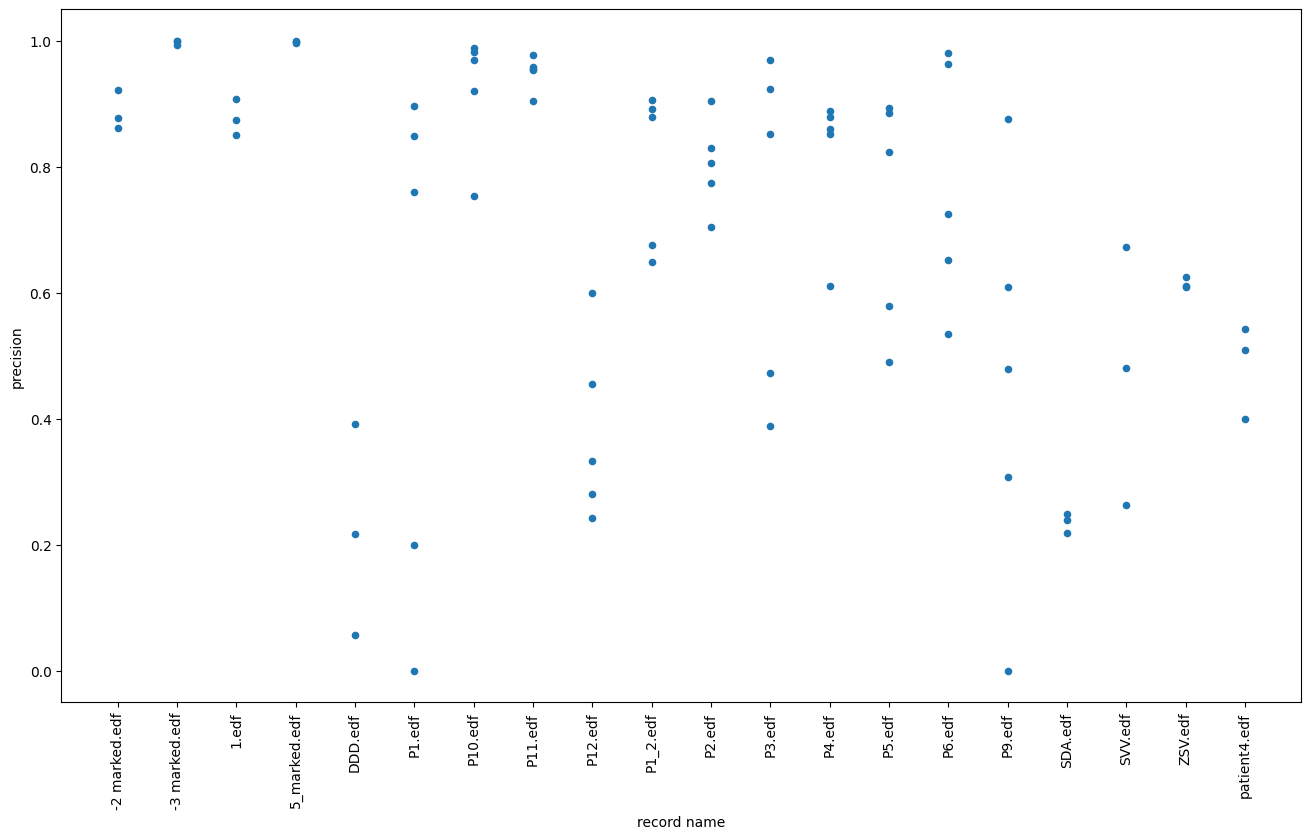

In [19]:
plt.figure(figsize=(16, 9))
plt.rcParams["figure.figsize"] = [16, 9]
df.plot(x="record name", y = "precision", kind="scatter", rot=90)

In [40]:
df[df["record name"] == "P1_4.edf"][["exp name", "swi"]]

,exp name,swi
107,MoscowRecordsNormalizedRightFreqSNEO&MC,0.168377
61,20RecordsNormalizedRightFreqSNEO&MC,0.168377
28,20RecordsNormalizedRightFreqOnlyMoscow,0.168377
2,20RecordsNormalizedRightFreq,0.168377
114,24RecordsNormalizedRightFreq,0.168377
81,20RecordsNormalized,0.168377
42,28RecordsNormalizedRightFreq,0.168377


In [18]:
df[df["record name"] == "P4.edf"][["exp name", "swi", "swi_pred"]]

,exp name,swi,swi_pred
17,20RecordsNormalizedRightFreq,0.099568,0.059696
100,MoscowRecordsNormalizedRightFreqSNEO&MC,0.099568,0.127009
21,20RecordsNormalizedRightFreqOnlyMoscow,0.099568,0.095116
55,28RecordsNormalizedRightFreq,0.099568,0.081018
76,20RecordsNormalizedRightFreqSNEO&MC,0.099568,0.077152
131,24RecordsNormalizedRightFreq,0.099568,0.087116
96,20RecordsNormalized,0.099568,0.065518
